In [1]:
import tomopy

In [13]:
import pyfits
import numpy as np
import os

In [3]:
%gui qt

In [36]:
from IPython.html import widgets
from IPython.display import display

In [145]:
from PyQt4 import QtCore, QtGui

def gui_fname(dir=None):
    """Select a file via a dialog and returns the file name.
    """
    if dir is None: dir ='./'
    dir_name = QtGui.QFileDialog.getExistingDirectory(None, "Select Folder ...",
                                                  dir,
                                                  QtGui.QFileDialog.ShowDirsOnly)
    return dir_name

In [146]:
# load the OB

In [147]:
%gui qt
ob_folder = str(gui_fname())
%matplotlib inline

In [148]:
import glob

In [149]:
print ob_folder

/Users/j35/git/notebooks/myIPythonNotebookTutorial/tomopy/data/OB


In [150]:
from pprint import pprint

In [151]:
pprint(glob.glob(ob_folder + '/*'))
list_ob_files = glob.glob(ob_folder + '/*')

['/Users/j35/git/notebooks/myIPythonNotebookTutorial/tomopy/data/OB/20120618_OB_0180_0_000_0014.fits',
 '/Users/j35/git/notebooks/myIPythonNotebookTutorial/tomopy/data/OB/20120618_OB_0180_0_000_0015.fits',
 '/Users/j35/git/notebooks/myIPythonNotebookTutorial/tomopy/data/OB/20120618_OB_0180_0_000_0016.fits',
 '/Users/j35/git/notebooks/myIPythonNotebookTutorial/tomopy/data/OB/20120618_OB_0180_0_000_0017.fits',
 '/Users/j35/git/notebooks/myIPythonNotebookTutorial/tomopy/data/OB/20120618_OB_0180_0_000_0018.fits',
 '/Users/j35/git/notebooks/myIPythonNotebookTutorial/tomopy/data/OB/20120618_OB_0180_0_000_0019.fits',
 '/Users/j35/git/notebooks/myIPythonNotebookTutorial/tomopy/data/OB/20120618_OB_0180_0_000_0020.fits',
 '/Users/j35/git/notebooks/myIPythonNotebookTutorial/tomopy/data/OB/20120618_OB_0180_0_000_0052.fits',
 '/Users/j35/git/notebooks/myIPythonNotebookTutorial/tomopy/data/OB/20120618_OB_0180_0_000_0053.fits',
 '/Users/j35/git/notebooks/myIPythonNotebookTutorial/tomopy/data/OB/20120

In [152]:
number_of_ob = len(list_ob_files)
print(number_of_ob)

17


In [153]:
ob_data = []
for _file in list_ob_files:
    ob_data.append(pyfits.open(_file)[0].data)
    type(pyfits.open(_file))


In [154]:
type(ob_data[0])

numpy.ndarray

In [155]:
ob_data[1]

array([[ 4508.,  4655.,  5167., ...,  6555.,  6511.,  6439.],
       [ 5175.,  5055.,  5323., ...,  6633.,  6640.,  6566.],
       [ 5263.,  4990.,  5257., ...,  6640.,  6627.,  6593.],
       ..., 
       [ 2371.,  2235.,  2288., ...,  2393.,  2401.,  2401.],
       [ 2378.,  2401.,  2305., ...,  2357.,  2390.,  2435.],
       [ 1961.,  2174.,  2272., ...,  2251.,  2265.,  2332.]], dtype=float32)

In [191]:
def getFilename(filename_template, angle):
        path_pattern = filename_template % (angle,)
        dir = os.path.dirname(path_pattern)
        basename = os.path.basename(path_pattern)
        base, ext = os.path.splitext(basename)
        # bad code
        path_pattern = os.path.join(dir, base.replace(".", "[_.]") + ext)
        
        paths = glob.glob(path_pattern)
        if len(paths)!=1:
            raise RuntimeError, "template %r no good: \npath_pattern=%r" % (
                filename_template, path_pattern)
    
        path = paths[0]
        return path

In [204]:
angle=0; getFilename(data_folder+"/2012*_%.3f_*.fits", angle)

'/Users/j35/git/notebooks/myIPythonNotebookTutorial/tomopy/data/TurbineLongCT/20120618_TURBINECT_0180_0_000_0000.fits'

In [212]:
angles=np.arange(0.0, 181.9+step, step);
list_data_files = map(lambda x: getFilename(data_folder+"/2012*_%.3f_*.fits", x), angles);
pprint(list_data_files)
               

['/Users/j35/git/notebooks/myIPythonNotebookTutorial/tomopy/data/TurbineLongCT/20120618_TURBINECT_0180_0_000_0000.fits',
 '/Users/j35/git/notebooks/myIPythonNotebookTutorial/tomopy/data/TurbineLongCT/20120618_TURBINECT_0180_0_850_0001.fits',
 '/Users/j35/git/notebooks/myIPythonNotebookTutorial/tomopy/data/TurbineLongCT/20120618_TURBINECT_0180_1_700_0002.fits',
 '/Users/j35/git/notebooks/myIPythonNotebookTutorial/tomopy/data/TurbineLongCT/20120618_TURBINECT_0180_2_550_0003.fits',
 '/Users/j35/git/notebooks/myIPythonNotebookTutorial/tomopy/data/TurbineLongCT/20120618_TURBINECT_0180_3_400_0004.fits',
 '/Users/j35/git/notebooks/myIPythonNotebookTutorial/tomopy/data/TurbineLongCT/20120618_TURBINECT_0180_4_250_0005.fits',
 '/Users/j35/git/notebooks/myIPythonNotebookTutorial/tomopy/data/TurbineLongCT/20120618_TURBINECT_0180_5_100_0006.fits',
 '/Users/j35/git/notebooks/myIPythonNotebookTutorial/tomopy/data/TurbineLongCT/20120618_TURBINECT_0180_5_950_0007.fits',
 '/Users/j35/git/notebooks/myIPy

In [156]:
# load the DF

In [157]:
%gui qt
df_folder = str(gui_fname())
%matplotlib inline

In [158]:
list_df_files = glob.glob(df_folder + '/*')

In [159]:
df_data = []
for _file in list_df_files:
    df_data.append(pyfits.open(_file)[0].data)

In [160]:
# load the data

In [161]:
%gui qt
data_folder = str(gui_fname())
%matplotlib inline

In [186]:
#list_data_files = glob.glob(data_folder + '/*')

In [188]:
#list_data_files.sort()
#pprint(list_data_files)


['/Users/j35/git/notebooks/myIPythonNotebookTutorial/tomopy/data/TurbineLongCT/20120618_TURBINECT_0180_0_000_0000.fits',
 '/Users/j35/git/notebooks/myIPythonNotebookTutorial/tomopy/data/TurbineLongCT/20120618_TURBINECT_0180_0_850_0001.fits',
 '/Users/j35/git/notebooks/myIPythonNotebookTutorial/tomopy/data/TurbineLongCT/20120618_TURBINECT_0180_10_200_0012.fits',
 '/Users/j35/git/notebooks/myIPythonNotebookTutorial/tomopy/data/TurbineLongCT/20120618_TURBINECT_0180_11_050_0013.fits',
 '/Users/j35/git/notebooks/myIPythonNotebookTutorial/tomopy/data/TurbineLongCT/20120618_TURBINECT_0180_11_900_0014.fits',
 '/Users/j35/git/notebooks/myIPythonNotebookTutorial/tomopy/data/TurbineLongCT/20120618_TURBINECT_0180_12_750_0015.fits',
 '/Users/j35/git/notebooks/myIPythonNotebookTutorial/tomopy/data/TurbineLongCT/20120618_TURBINECT_0180_13_600_0016.fits',
 '/Users/j35/git/notebooks/myIPythonNotebookTutorial/tomopy/data/TurbineLongCT/20120618_TURBINECT_0180_14_450_0017.fits',
 '/Users/j35/git/notebooks

In [213]:
data = []
for _file in list_data_files:
    data.append(pyfits.open(_file)[0].data)

In [214]:
proj = tomopy.normalize(data, ob_data, df_data)

In [215]:
step = 0.85

In [216]:
theta = np.pi/180.*(np.arange(0.0, 181.9+step, step))
print(np.arange(0.0, 181.9+step, step))

[   0.      0.85    1.7     2.55    3.4     4.25    5.1     5.95    6.8
    7.65    8.5     9.35   10.2    11.05   11.9    12.75   13.6    14.45
   15.3    16.15   17.     17.85   18.7    19.55   20.4    21.25   22.1
   22.95   23.8    24.65   25.5    26.35   27.2    28.05   28.9    29.75
   30.6    31.45   32.3    33.15   34.     34.85   35.7    36.55   37.4
   38.25   39.1    39.95   40.8    41.65   42.5    43.35   44.2    45.05
   45.9    46.75   47.6    48.45   49.3    50.15   51.     51.85   52.7
   53.55   54.4    55.25   56.1    56.95   57.8    58.65   59.5    60.35
   61.2    62.05   62.9    63.75   64.6    65.45   66.3    67.15   68.
   68.85   69.7    70.55   71.4    72.25   73.1    73.95   74.8    75.65
   76.5    77.35   78.2    79.05   79.9    80.75   81.6    82.45   83.3
   84.15   85.     85.85   86.7    87.55   88.4    89.25   90.1    90.95
   91.8    92.65   93.5    94.35   95.2    96.05   96.9    97.75   98.6
   99.45  100.3   101.15  102.    102.85  103.7   104.55  1

In [217]:
pprint(theta)

array([ 0.        ,  0.0148353 ,  0.0296706 ,  0.0445059 ,  0.05934119,
        0.07417649,  0.08901179,  0.10384709,  0.11868239,  0.13351769,
        0.14835299,  0.16318829,  0.17802358,  0.19285888,  0.20769418,
        0.22252948,  0.23736478,  0.25220008,  0.26703538,  0.28187067,
        0.29670597,  0.31154127,  0.32637657,  0.34121187,  0.35604717,
        0.37088247,  0.38571776,  0.40055306,  0.41538836,  0.43022366,
        0.44505896,  0.45989426,  0.47472956,  0.48956486,  0.50440015,
        0.51923545,  0.53407075,  0.54890605,  0.56374135,  0.57857665,
        0.59341195,  0.60824724,  0.62308254,  0.63791784,  0.65275314,
        0.66758844,  0.68242374,  0.69725904,  0.71209433,  0.72692963,
        0.74176493,  0.75660023,  0.77143553,  0.78627083,  0.80110613,
        0.81594143,  0.83077672,  0.84561202,  0.86044732,  0.87528262,
        0.89011792,  0.90495322,  0.91978852,  0.93462381,  0.94945911,
        0.96429441,  0.97912971,  0.99396501,  1.00880031,  1.02

In [68]:
import matplotlib.pyplot as plt

In [69]:
%matplotlib notebook

In [141]:
# proj = np.r_[proj[0:70], proj[81:225]].copy()
#theta = np.r_[theta[0:70], theta[81:225]].copy()

In [224]:
rot_center = tomopy.find_center(proj, theta, emission=False, init=1024, tol=0.5)
print("Center of rotation: ", rot_center)

('Center of rotation: ', array([ 1023.2]))


In [219]:
print proj.shape
tomopy.write_center(proj.copy(), theta, dpath='/Users/j35/Desktop/data/tmp', emission=False)

(215, 2048, 2048)


In [228]:
print proj.shape
rot_center = tomopy.find_center_vo(proj.copy())
print("Center of rotation: ", rot_center)

(215, 2048, 2048)


UnboundLocalError: local variable 'init' referenced before assignment

In [232]:
proj = tomopy.normalize_bg(data)

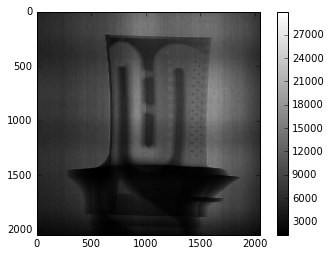

In [230]:
fig, ax = plt.subplots()
im = plt.imshow(data[0], cmap='gray') #, vmin=0.2, vmax=1.2
fig.colorbar(im)

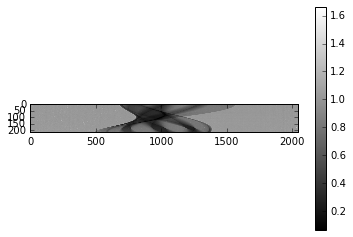

In [221]:
fig, ax = plt.subplots()
im = plt.imshow(proj[:, 1000, :], cmap='gray')
fig.colorbar(im)

In [223]:
tomopy.write_tiff_stack(proj, fname='/Users/j35/Desktop/data/sino/tmp', axis=1, overwrite=True)

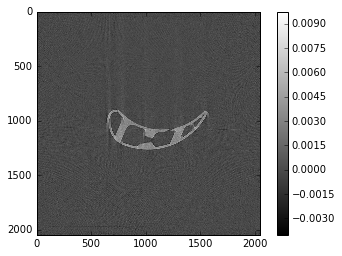

In [225]:
rec = tomopy.recon(proj[:, 600:601, :], theta=theta, center=1023.2, algorithm='gridrec', emission=False)

fig, ax = plt.subplots()
im = plt.imshow(rec[0], cmap='gray')
fig.colorbar(im)

In [227]:
print proj.shape, rec.shape
tomopy.write_tiff_stack(rec, fname='/Users/j35/Desktop/data/reco/tmp', axis=0, overwrite=True)

(215, 2048, 2048) (1, 2048, 2048)
